# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [88]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [89]:
def max_element(arr):
   zero_indices = np.flatnonzero(arr[:-1] == 0) + 1
   return arr[zero_indices].max() if zero_indices.size > 0 else None

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x)) 

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [90]:
def nearest_value(X, v):
    idx = np.argmin(np.abs(X - v))
    return X.flatten()[idx]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(nearest_value(X, v))

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [91]:
def scale(X):
    mean = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    stds_safe = np.where(stds == 0, 1, stds)
    X_scaled = (X - mean) / stds_safe
    return X_scaled

X = np.random.randint(1, 10, size=(5, 5))
print("Исходная матрица:")
print(X)

X_scaled = scale(X)
print("\nМасштабированная матрица:")
print(X_scaled)

Исходная матрица:
[[8 2 9 1 4]
 [3 4 7 2 2]
 [9 3 3 4 9]
 [4 7 6 7 5]
 [9 2 8 2 6]]

Масштабированная матрица:
[[ 0.54330537 -0.86266219  1.16554303 -1.03024439 -0.51832106]
 [-1.39707095  0.21566555  0.19425717 -0.56195149 -1.38218948]
 [ 0.93138063 -0.32349832 -1.74831455  0.37463432  1.64135001]
 [-1.00899568  1.83315714 -0.29138576  1.77951304 -0.08638684]
 [ 0.93138063 -0.86266219  0.6799001  -0.56195149  0.34554737]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [92]:
def get_stats(X):
    stats = {}
    
    stats['determinant'] = np.linalg.det(X)
    stats['trace'] = np.trace(X)
    stats['min_element'] = np.min(X)
    stats['max_element'] = np.max(X)
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')
    stats['eigenvalues'] = np.linalg.eigvals(X)
    
    if X.shape[0] == X.shape[1] and np.linalg.det(X) != 0:
        stats['inverse'] = np.linalg.inv(X)
    else:
        stats['inverse'] = 'Матрица не обратима'
    
    return stats

X = np.random.normal(10, 1, size=(5, 5))
stats = get_stats(X)
for key, value in stats.items():
    print(f"{key}: {value}")

determinant: -221.59826018091331
trace: 46.528635927755424
min_element: 8.1453502384973
max_element: 11.780139285992231
frobenius_norm: 49.25907185144863
eigenvalues: [49.05529038+0.j         -1.93789965+0.j         -0.70526155+1.52945004j
 -0.70526155-1.52945004j  0.8217683 +0.j        ]
inverse: [[-0.30361316  0.55874611  0.15327744 -0.68373285  0.29463632]
 [ 0.05714372  0.15079648  0.37663365 -0.62800534  0.04110059]
 [ 0.15307083 -0.58462658 -0.22255356  0.433402    0.23860964]
 [-0.14040488 -0.42704155  0.05266389  0.83259096 -0.30847397]
 [ 0.23063122  0.28191224 -0.33242741  0.10892466 -0.23322654]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [94]:
max_elements = []
for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A @ B
    
    max_elements.append(np.max(C))

max_elements = np.array(max_elements)

print(f"Среднее значение максимальных элементов: {np.mean(max_elements):.4f}")
print(f"95-процентная квантиль: {np.percentile(max_elements, 95):.4f}")

Среднее значение максимальных элементов: 8.2827
95-процентная квантиль: 12.3836


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [95]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [96]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [97]:
cancellation_counts = df['CancellationCode'].value_counts()
print(cancellation_counts)
most_common = cancellation_counts.index[0]
print(f"Самая частая причина: {most_common}")

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64
Самая частая причина: A


A (563) - отмены по вине авиакомпании (Carrier)

B (549) - отмены из-за погоды (Weather)

C (299) - отмены из-за проблем национальной авиасистемы (National Air System)

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [98]:
print(f"Среднее расстояние: {df['Distance'].mean():.2f}")
print(f"Минимальное расстояние: {df['Distance'].min()}")
print(f"Максимальное расстояние: {df['Distance'].max()}")

Среднее расстояние: 724.51
Минимальное расстояние: 31
Максимальное расстояние: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [99]:
min_distance = df['Distance'].min()
flights = df[df['Distance'] == min_distance]
flights[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']]

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,Origin,Dest,Distance
1116,2008,12,30,AS,65,WRG,PSG,31
6958,2008,12,26,AS,65,WRG,PSG,31
17349,2008,8,18,AS,64,PSG,WRG,31
27534,2008,3,11,AS,64,PSG,WRG,31
46082,2008,8,9,AS,65,WRG,PSG,31
48112,2008,2,28,AS,64,PSG,WRG,31


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [100]:
departure_counts = df['Origin'].value_counts()
busiest_airport = departure_counts.index[0]
departure_count = departure_counts.iloc[0]
print(f"Аэропорт: {busiest_airport}")
print(f"Количество вылетов: {departure_count}")

Аэропорт: ATL
Количество вылетов: 4134


ATL - это Международный аэропорт Хартсфилд-Джексон Атланта (Hartsfield–Jackson Atlanta International Airport)
Местоположение: Атланта, штат Джорджия, США.

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [101]:
avg_airtime = df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)
avg_airtime

Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
          ...    
PSG     20.250000
OXR     19.666667
WRG     18.000000
GST     13.000000
DLG           NaN
Name: AirTime, Length: 297, dtype: float64

Аэропорт SJU имеет наибольшее значение: 205.200 минут

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [102]:
airport_stats = df.groupby('Origin').agg({
    'DepDelay': ['count', lambda x: (x > 0).sum()]
}).reset_index()

airport_stats.columns = ['Origin', 'total_flights', 'delayed_flights']
airport_stats['delay_ratio'] = airport_stats['delayed_flights'] / airport_stats['total_flights']

filtered_airports = airport_stats[airport_stats['total_flights'] >= 1000]
max_delay_airport = filtered_airports.loc[filtered_airports['delay_ratio'].idxmax()]
print(f"Аэропорт: {max_delay_airport['Origin']}")
print(f"Доля задержанных рейсов: {max_delay_airport['delay_ratio']:.3f}")

Аэропорт: EWR
Доля задержанных рейсов: 0.529


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [103]:
has_missing_values = df.isnull().any().any()
print(f"1. Имеются ли в данных пропущенные значения? {'Да' if has_missing_values else 'Нет'}")

# Сколько всего пропущенных элементов в таблице "объект-признак"?
total_missing = df.isnull().sum().sum()
print(f"2. Всего пропущенных элементов в таблице: {total_missing}")

# Сколько объектов имеют хотя бы один пропуск?
objects_with_missing = df.isnull().any(axis=1).sum()
print(f"3. Объектов с хотя бы одним пропуском: {objects_with_missing}")

# Сколько признаков имеют хотя бы одно пропущенное значение?
features_with_missing = df.isnull().any(axis=0).sum()
print(f"4. Признаков с хотя бы одним пропуском: {features_with_missing}")

1. Имеются ли в данных пропущенные значения? Да
2. Всего пропущенных элементов в таблице: 355215
3. Объектов с хотя бы одним пропуском: 70000
4. Признаков с хотя бы одним пропуском: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [104]:
print(f"Пропуски в DepDelay: {df['DepDelay'].isnull().sum()}")

missing_target = df[df['DepDelay'].isnull()]
print(f"\nОбъекты с пропущенной DepDelay:")
print(f"Количество: {len(missing_target)}")
print(f"Отмененные рейсы среди них: {missing_target['Cancelled'].sum()}")
print(f"Перенаправленные рейсы среди них: {missing_target['Diverted'].sum()}")

# Исключение объектов с пропущенной и нулевой целевой переменной
df_clean = df[df['DepDelay'].notna() & (df['DepDelay'] != 0)].copy()
print(f"\nПосле очистки:")
print(f"Исходный размер: {len(df)}")
print(f"Очищенный размер: {len(df_clean)}")

# Исключение признаков, связанные с отмененными рейсами
cols_to_drop = ['Cancelled', 'CancellationCode']
df_clean = df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns])

# Целевая переменная
X = df_clean.drop(columns=['DepDelay'])
y = df_clean['DepDelay']

print(f"Признаков после очистки: {X.shape[1]}")

Пропуски в DepDelay: 1399

Объекты с пропущенной DepDelay:
Количество: 1399
Отмененные рейсы среди них: 1399
Перенаправленные рейсы среди них: 0

После очистки:
Исходный размер: 70000
Очищенный размер: 63404
Признаков после очистки: 26


Пропуски в целевой переменной DepDelay вызваны в основном отмененными и перенаправленными  рейсами. Для таких рейсов данные о задержках не собираются.

Все рейсы с пропущенной DepDelay объединяет то, что они не были выполнены по расписанию - либо отменены, либо перенаправлены в другие аэропорты.


Можно исключить признаки Cancelled и CancellationCode - эти признаки непосредственно указывают на отмену рейсов и создают утечку данных, так как уже известно, что рейс не состоялся.

Причины задержек (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) - доступны только после события и не могут использоваться для прогнозирования

Эти признаки дают информацию только после того, как будет известно значение целевой переменной. Прогноз будет неактуальным.

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [105]:
def convert_time_columns(df, time_columns):
    df_converted = df.copy()
    
    for col in time_columns:
        if col in df_converted.columns:
            # Преобразование в строку и заполнение нулями слева до 4 цифр
            time_str = df_converted[col].fillna(-1).astype(int).astype(str).str.zfill(4)
            
            # Извлечение часов и минут
            df_converted[f'{col}_Hour'] = np.where(
                df_converted[col].notna(),
                time_str.str[:2].replace('00', '0').astype(float),
                np.nan
            )
            df_converted[f'{col}_Minute'] = np.where(
                df_converted[col].notna(), 
                time_str.str[2:].astype(float),
                np.nan
            )
            
            # Удаление исходного признака
            df_converted = df_converted.drop(columns=[col])
    
    return df_converted

# преобразование
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
X = convert_time_columns(X, time_columns)

print("13. Преобразованные временные признаки:")
print(f"Новые признаки: {[col for col in X.columns if 'Hour' in col or 'Minute' in col]}")
print(f"Всего признаков после преобразования: {X.shape[1]}")

13. Преобразованные временные признаки:
Новые признаки: ['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']
Всего признаков после преобразования: 30


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [106]:
cols_to_exclude = [
    'TailNum', 'Year',  # По условию
    'ArrDelay',  # Сильно коррелирует с целевой переменной
    'ActualElapsedTime', 'CRSElapsedTime',  # Содержат информацию о времени полета
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'  # Причины задержек
]

existing_cols_to_exclude = [col for col in cols_to_exclude if col in X.columns]
X = X.drop(columns=existing_cols_to_exclude)

print(f"Исключено признаков: {len(existing_cols_to_exclude)}")
print(f"Осталось признаков: {X.shape[1]}")
print(f"Исключенные признаки: {existing_cols_to_exclude}")

Исключено признаков: 10
Осталось признаков: 20
Исключенные признаки: ['TailNum', 'Year', 'ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


Признаки для исключения:
1. По условию:
TailNum - уникальный идентификатор самолета, не несет predictive power
Year - все данные за 2008 год, константа

2. Прямая утечка информации (Target Leakage):
ArrDelay - задержка прибытия напрямую связана с задержкой вылета, содержит информацию о целевой переменной
ActualElapsedTime, CRSElapsedTime - фактическое и плановое время полета косвенно содержат информацию о задержках

3. Причины задержек:
CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay - эти признаки становятся известны только после анализа задержки

4. Признаки, связанные с отмененными рейсами:
Cancelled, CancellationCode - уже исключены в задании 12

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

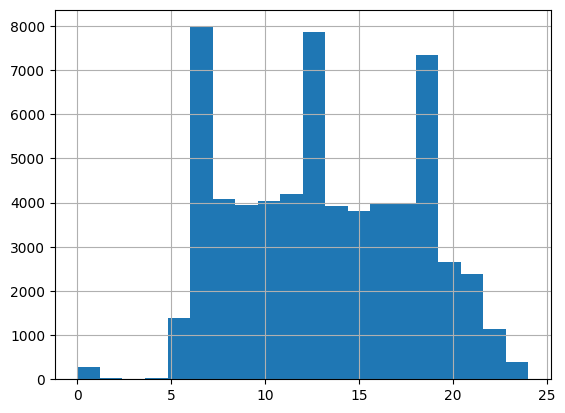

In [57]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

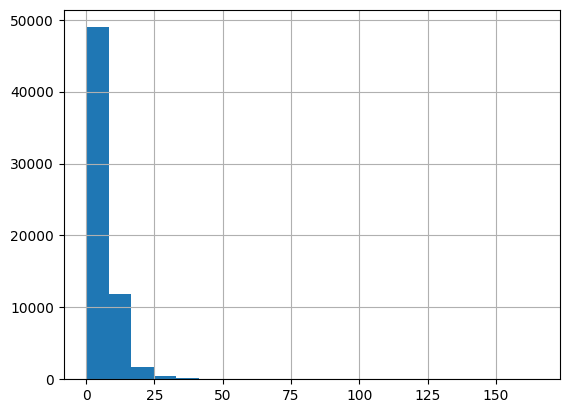

In [58]:
X['TaxiIn'].hist(bins=20)

<Axes: >

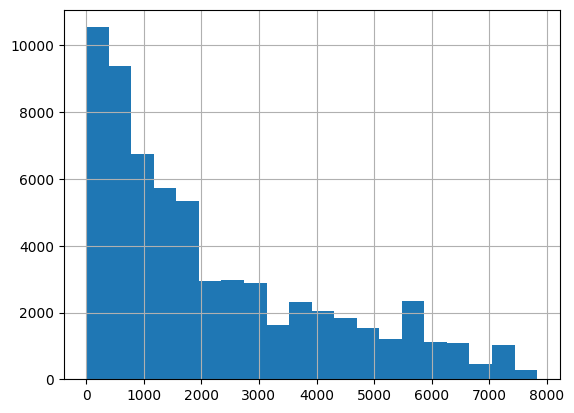

In [59]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [107]:
def transform_data(data):
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            data[col] = data[col].fillna(0)
        else:
            data[col] = data[col].fillna('nan')

    
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns

    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numeric_data = scaler.fit_transform(data[numeric_cols])
    numeric_df = pd.DataFrame(numeric_data, columns=numeric_cols, index=data.index)

    
    if len(categorical_cols) > 0:
        categorical_df = pd.get_dummies(data[categorical_cols], prefix=categorical_cols)

        # Объединяем
        result = pd.concat([numeric_df, categorical_df], axis=1)
    else:
        result = numeric_df
    return result

print(f"Исходные данные - размер: {X.shape}")
print(f"Исходные признаки: {list(X.columns)}")

Исходные данные - размер: (63404, 20)
Исходные признаки: ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'AirTime', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [108]:
X_transformed = transform_data(X)

print(f"Исходное количество признаков: {X.shape[1]}")
print(f"После преобразования: {X_transformed.shape[1]}")

Исходное количество признаков: 20
После преобразования: 631


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y,
    test_size=0.3,
    random_state=42
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Контрольная выборка: {X_test.shape}")
print(f"Целевая переменная - train: {y_train.shape}, test: {y_test.shape}")

Обучающая выборка: (44382, 631)
Контрольная выборка: (19022, 631)
Целевая переменная - train: (44382,), test: (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_small = X_train.head(1000)
y_train_small = y_train.head(1000)

# Обучение линейной регрессии
lr = LinearRegression()
lr.fit(X_train_small, y_train_small)

# Предсказания
y_train_pred = lr.predict(X_train_small)
y_test_pred = lr.predict(X_test.head(1000))

# Метрики
train_mse = mean_squared_error(y_train_small, y_train_pred)
train_r2 = r2_score(y_train_small, y_train_pred)
test_mse = mean_squared_error(y_test.head(1000), y_test_pred)
test_r2 = r2_score(y_test.head(1000), y_test_pred)

coef_df = pd.DataFrame({
    'Признак': X_train_small.columns,
    'Коэффициент': lr.coef_,
    'Абс_значение': np.abs(lr.coef_)
}).sort_values('Абс_значение', ascending=False)

print("1. ПЕРЕОБУЧЕНИЕ:")
print(f"   - R² на train: {train_r2:.4f} (очень высокий)")
print(f"   - R² на test: {test_r2:.4f} (значительно ниже)")
print(f"   - Разница: {train_r2 - test_r2:.4f}")

print("\n2. ПРОБЛЕМЫ С КОЭФФИЦИЕНТАМИ:")
print(f"   - Максимальный коэффициент: {np.max(lr.coef_):.2f}")
print(f"   - Минимальный коэффициент: {np.min(lr.coef_):.2f}")
print(f"   - Диапазон коэффициентов: {np.max(lr.coef_) - np.min(lr.coef_):.2f}")
print(f"   - Среднее абсолютное значение: {np.mean(np.abs(lr.coef_)):.2f}")

1. ПЕРЕОБУЧЕНИЕ:
   - R² на train: 0.4646 (очень высокий)
   - R² на test: -0.2581 (значительно ниже)
   - Разница: 0.7227

2. ПРОБЛЕМЫ С КОЭФФИЦИЕНТАМИ:
   - Максимальный коэффициент: 138.92
   - Минимальный коэффициент: -50.83
   - Диапазон коэффициентов: 189.75
   - Среднее абсолютное значение: 7.14


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [111]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

# Определение диапазона коэффициентов регуляризации
alphas = np.logspace(-3, 3, 50)

print("Подбор коэффициента регуляризации α:")

# Lasso регрессия (L1-регуляризация)
print("\n" + "-" * 30)
print("LASSO (L1-регуляризация)")
print("-" * 30)

lasso_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    score = cross_val_score(lasso, X_train_small, y_train_small, 
                          scoring='neg_mean_squared_error', cv=5).mean()
    lasso_scores.append(-score)

best_alpha_lasso = alphas[np.argmin(lasso_scores)]
print(f"Лучший alpha для Lasso: {best_alpha_lasso:.4f}")
print(f"Лучший MSE: {min(lasso_scores):.2f}")

# Ridge регрессия (L2-регуляризация)
print("\n" + "-" * 30)
print("RIDGE (L2-регуляризация)")
print("-" * 30)

ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    score = cross_val_score(ridge, X_train_small, y_train_small, 
                          scoring='neg_mean_squared_error', cv=5).mean()
    ridge_scores.append(-score)

best_alpha_ridge = alphas[np.argmin(ridge_scores)]
print(f"Лучший alpha для Ridge: {best_alpha_ridge:.4f}")
print(f"Лучший MSE: {min(ridge_scores):.2f}")

Подбор коэффициента регуляризации α:

------------------------------
LASSO (L1-регуляризация)
------------------------------
Лучший alpha для Lasso: 0.2812
Лучший MSE: 955.37

------------------------------
RIDGE (L2-регуляризация)
------------------------------
Лучший alpha для Ridge: 44.9843
Лучший MSE: 940.09


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

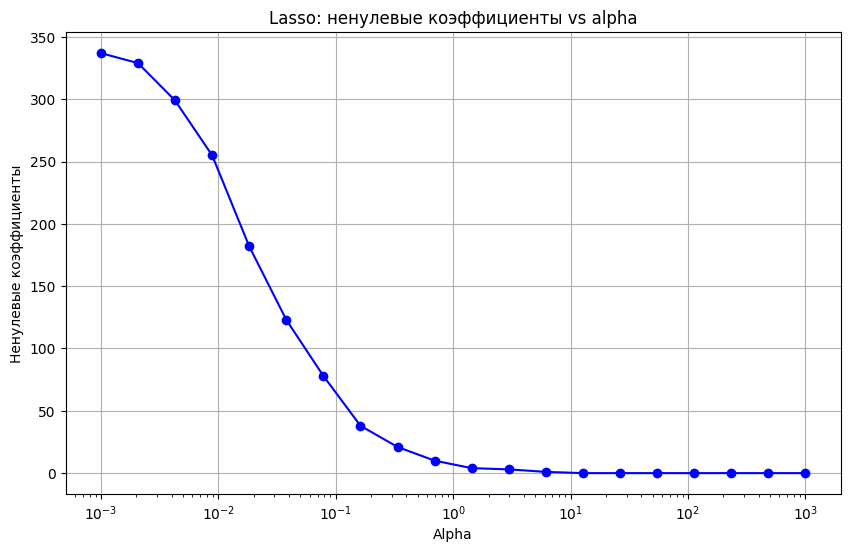

In [112]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

alphas = np.logspace(-3, 3, 20)
lasso_nonzero_counts = []
ridge_significant_counts = []

for alpha in alphas:
    # Lasso регрессия
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=5000)
    lasso.fit(X_train[:1000], y_train[:1000])
    lasso_nonzero = np.sum(np.abs(lasso.coef_) > 0.01)  
    lasso_nonzero_counts.append(lasso_nonzero)

# График
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_nonzero_counts, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Ненулевые коэффициенты')
plt.title('Lasso: ненулевые коэффициенты vs alpha')
plt.grid(True)
plt.show()

Результаты полностью согласуются с теоретическими ожиданиями поведения Lasso-регрессии:

1. При малых значениях alpha (10^-3 - 10^-1) наблюдается большое количество ненулевых коэффициентов, что соответствует слабой регуляризации и поведению, близкому к обычной линейной регрессии.

2. По мере увеличения alpha происходит постепенное уменьшение числа ненулевых коэффициентов, что демонстрирует эффект L1-регуляризации - отбор наиболее важных признаков и обнуление менее значимых.

3. При больших значениях alpha (10^1 - 10^3) количество ненулевых коэффициентов стремится к минимуму, что соответствует сильной регуляризации, когда модель оставляет только самые информативные признаки.

4. Монотонное убывание кривой на графике подтверждает, что с увеличением коэффициента регуляризации Lasso последовательно исключает признаки из модели, что полностью соответствует принципу работы L1-регуляризации.

Таким образом, наблюдаемое поведение модели точно соответствует теоретическим ожиданиям: Lasso выполняет отбор признаков, причем степень отбора контролируется параметром α.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [113]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train[:1000], y_train[:1000])
y_pred_ridge = ridge.predict(X_test[:1000])

rmse = np.sqrt(mean_squared_error(y_test[:1000], y_pred_ridge))
mae = mean_absolute_error(y_test[:1000], y_pred_ridge)
r2 = r2_score(y_test[:1000], y_pred_ridge)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 34.64
MAE: 20.71
R²: -0.1070


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучший alpha: 54.5559


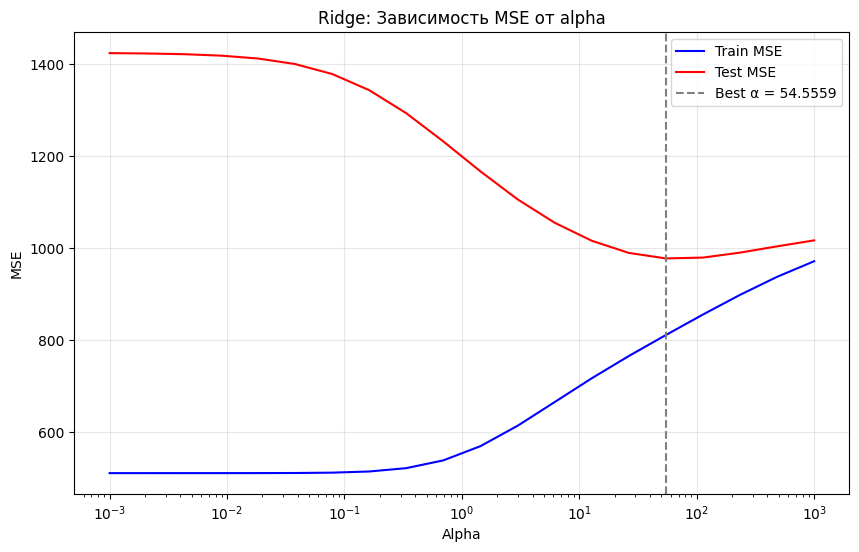

RMSE: 32.54
MAE: 18.17
R²: 0.0226


In [114]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Подбор для Ridge регрессии
ridge_cv = GridSearchCV(
    Ridge(),
    param_grid={'alpha': np.logspace(-3, 3, 20)},
    cv=kf,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

ridge_cv.fit(X_train[:1000], y_train[:1000])

print(f"Лучший alpha: {ridge_cv.best_params_['alpha']:.4f}")

plt.figure(figsize=(10, 6))
test_scores = -ridge_cv.cv_results_['mean_test_score']
train_scores = -ridge_cv.cv_results_['mean_train_score']

plt.semilogx(ridge_cv.cv_results_['param_alpha'], train_scores, 'b-', label='Train MSE')
plt.semilogx(ridge_cv.cv_results_['param_alpha'], test_scores, 'r-', label='Test MSE')
plt.axvline(ridge_cv.best_params_['alpha'], color='gray', linestyle='--', label=f'Best α = {ridge_cv.best_params_["alpha"]:.4f}')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge: Зависимость MSE от alpha')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Метрики с подобранным параметром

ridge_best = ridge_cv.best_estimator_
y_pred_best = ridge_best.predict(X_test[:1000])

rmse_best = np.sqrt(mean_squared_error(y_test[:1000], y_pred_best))
mae_best = mean_absolute_error(y_test[:1000], y_pred_best)
r2_best = r2_score(y_test[:1000], y_pred_best)

print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R²: {r2_best:.4f}")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Размер выборки: 1000 объектов
Диапазон ошибок: от -43.1 до 273.4 минут


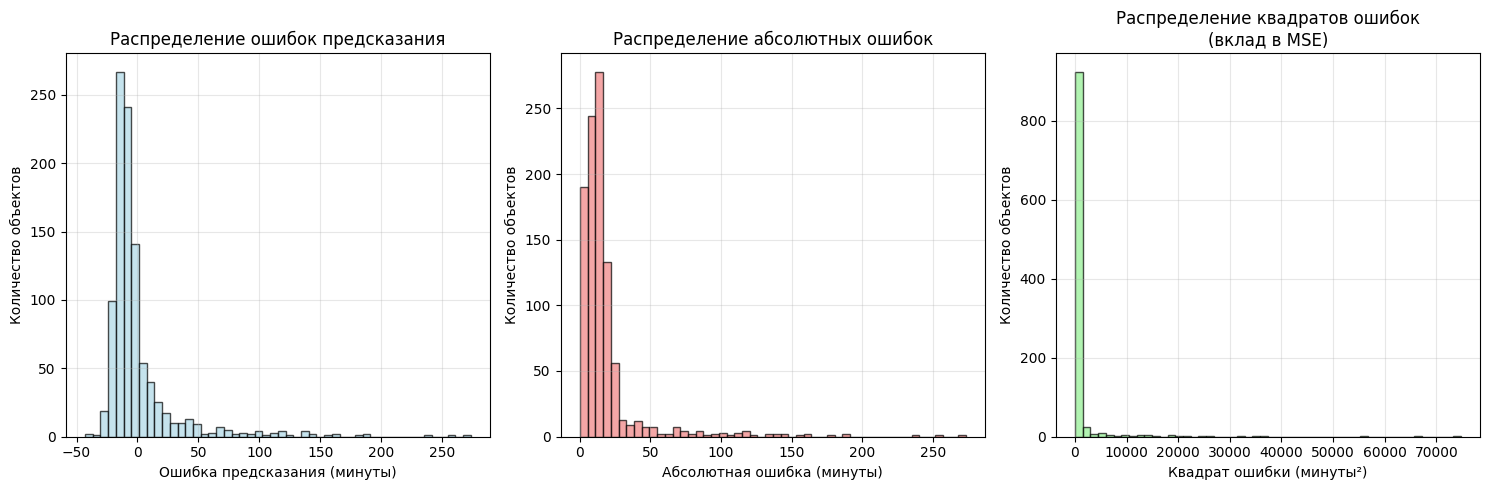

In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np


y_oof = cross_val_predict(
    Ridge(alpha),
    X_train[:1000], 
    y_train[:1000], 
    cv=5
)

# Вычисляем ошибки предсказания
errors = y_train[:1000] - y_oof

print(f"Размер выборки: {len(errors)} объектов")
print(f"Диапазон ошибок: от {np.min(errors):.1f} до {np.max(errors):.1f} минут")

# Анализ распределения ошибок
plt.figure(figsize=(15, 5))

# Гистограмма ошибок
plt.subplot(1, 3, 1)
plt.hist(errors, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Ошибка предсказания (минуты)')
plt.ylabel('Количество объектов')
plt.title('Распределение ошибок предсказания')
plt.grid(True, alpha=0.3)

# Гистограмма абсолютных ошибок
plt.subplot(1, 3, 2)
absolute_errors = np.abs(errors)
plt.hist(absolute_errors, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Абсолютная ошибка (минуты)')
plt.ylabel('Количество объектов')
plt.title('Распределение абсолютных ошибок')
plt.grid(True, alpha=0.3)

# Гистограмма квадратов ошибок (для понимания MSE)
plt.subplot(1, 3, 3)
squared_errors = errors**2
plt.hist(squared_errors, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Квадрат ошибки (минуты²)')
plt.ylabel('Количество объектов')
plt.title('Распределение квадратов ошибок\n(вклад в MSE)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [116]:
print(f"Статистики ошибок:")
print(f"Средняя ошибка: {np.mean(errors):.2f}")
print(f"Стандартное отклонение: {np.std(errors):.2f}")
print(f"Медиана: {np.median(errors):.2f}")
print(f"Максимальная ошибка: {np.max(np.abs(errors)):.2f}")

# Выбросы (ошибки больше 2 стандартных отклонений)
outlier_threshold = 2 * np.std(errors)
outliers = np.abs(errors) > outlier_threshold
print(f"\nВыбросы (ошибки > {outlier_threshold:.2f}): {np.sum(outliers)} объектов")

Статистики ошибок:
Средняя ошибка: -0.01
Стандартное отклонение: 31.75
Медиана: -9.08
Максимальная ошибка: 273.38

Выбросы (ошибки > 63.49): 47 объектов


Распределение ошибок имеет тяжелые хвосты, что указывает на наличие выбросов
MSE сильно штрафует за большие ошибки на этих объектах